# **Loan Approval Investigation**

**Loading packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Describing the data**

My analysis is based around the 'loan approval' dataset taken from the external source, Kaggle (Uikey, 2020). The dataset describes the home loans that Dream Housing Finance company deals. Loan classification is a common real-life problem that financing companies face. Lack of machine intelligence makes it difficult to understand whether a loan should be approved based on the individual attributes, the loan amount that should be offered to the individual and what financial products would be suited to them based on their risk profile. 

In [2]:
#Table 1
df = pd.read_csv('loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Description of variables**

LoanID : Unique Loan ID

Gender : Male/Female

Married: Applicant Married (Y/N)

Dependents: Number of dependents

Education : Applicant Education (Graduate/Under Graduate)

Self_Employed : Self employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome: Co-applicant Income

LoanAmount: Loan amount in thousands

Loan_Amount_Term : Term of loan in months

Credit_History : Credit history meets guidelines

Property_Area: Urban/Semi Urban/Rural

Loan_Status: Loan approved (Y/N)

**Hypotheses generation**

We will test the following hypotheses:

•	Applicants with higher income are more likely to receive a higher loan amount. (We will test this assumption via linear regression).

•	Applicant income has no impact on coapplicant income. (We will test this assumption via linear regression).


•	The applicant income, coapplicant income, loan amount term and credit history impact whether a loan will be accepted or rejected. (We will test this assumption via binary classification).

•	Income inequality exists within the data which result in different financial product offerings. (We will test this assumption via clustering analysis).

In [3]:
df.shape

(614, 13)

Our dataset consists of 614 rows and 13 columns. From assessing the 'Property_Area' column in table 1 we can see that home loans are present across urban, semiurban and rural areas. Other factors that are taken into consideration for loan eligibility are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see that this dataset consists of three formats of data types:

object: these variables are categorical and consist of Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area and Loan_Status.

int64: these are integer variables and consist of ApplicantIncome.

float64: these are numerical values that have decimals invoved and consist of CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

In [5]:
#Table 2
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From the high-level description in table 2 we can see that the average loan amount seems to be £146k. This is given to individuals with an average income of £5403.46 and average co-applicant income of £1621.25. The average loan amount term for individuals in the sample appears to be 342 months (28.5 years). 

In [6]:
#Table 3
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


We will also use a heatmap to visualise the correlation of numerical values in the sample.

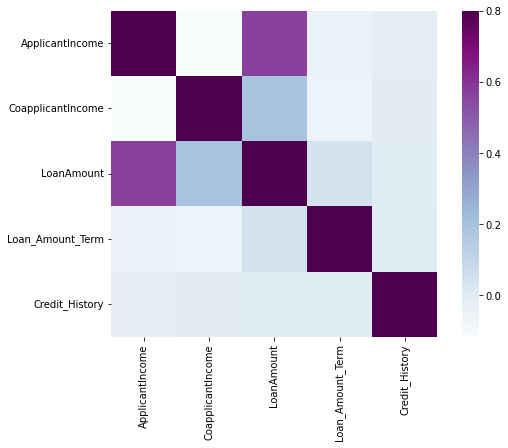

In [7]:
#Diagram 4 - Heatmap correlation matrix
matrix = df.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

Table 3 describes the correlation between numerical variables of the dataset. Diagram 4 looks at the correlation matrix where darker squares indicate a stronger positive correlation between variables. From table 3 we can see that Loan Amount and Applicant Income have the highest positive correlation at 57% which indicates that individuals who earn higher incomes are likely to receive a greater loan amount. Applicant income and coapplicant income have the greatest negative correlation at -11.7% which indicates that applicant income has no impact on coapplicant income. However, coapplicant income still correlates with loan amount by 18.9%. 

# **Exploratory Analysis**

**Identifying our target variable**

<AxesSubplot:>

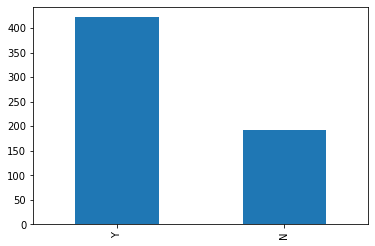

In [8]:
#Diagram 5
df['Loan_Status'].value_counts().plot.bar()

In [9]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

We will use Loan Status as our target variable for our analysis. It can be inferred that a higher proportion of loans in the dataset are accepted than rejected. There is a 68.7% acceptance rate and 31.3% rejection rate. 

**Identifying our independent variables**

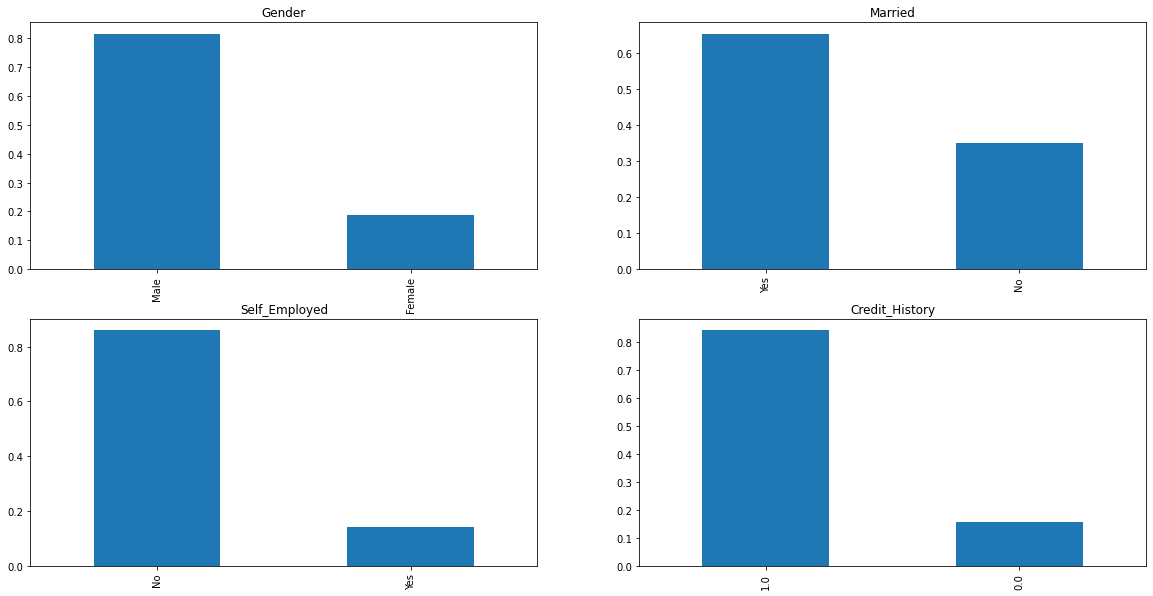

In [10]:
#Diagram 6 - Categorical independent variables
plt.figure(1)
plt.subplot(221)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

It can be inferred that 80% of applicants in the sample are male and 20% are female. This implies that men are more likely to apply for loans than women. Research also supports this theory as men are shown to have 20% more personal loan debt than women (McGurran, 2022). 


65% of applicants are married and 35% are not married. We can assume that the status of an individuals relationship can influence the financial factors a lender looks at to determine whether the individual is approved for a loan (Trulia, 2016). It could also be implied that those individuals that are married are more likely to state their relationship status, as having evidence of joint income could help with their loan application. We can investigate this theory further by looking at how coapplicant income affects the loan status. 


85% of applicants are not self employed and 15% are self employed. There may be less self employed individuals applying for a loan because being self employed can affect your credit score and you could be considered a riskier borrower, which in turn affects your ability as an individual to borrow money (Clark, 2019). 


85% of applicants have a good credit history and positive proof that they repay their debts. We would expect that those applying for a loan would have a good credit history as they need to demonstrate to lenders they have the ability to pay back their debts on time. 

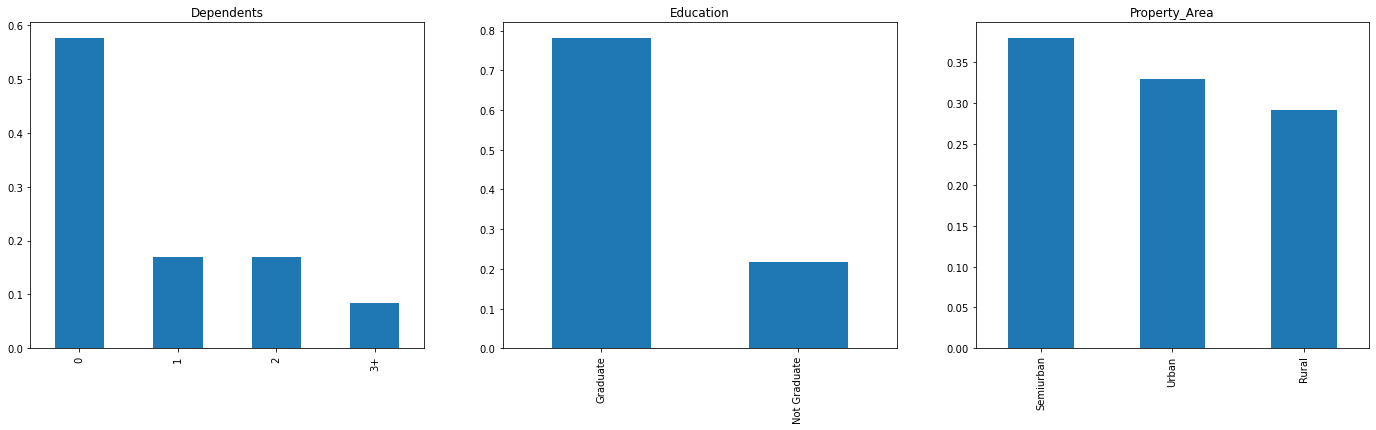

In [11]:
#Diagram 7 - Ordinal independent variables
plt.figure(1) 
plt.subplot(131) 
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

It can be inferred that most applicants do not rely on dependents. Roughly 58% of applicants in the sample have zero dependents. 

80% of applicants in the sample are graduates and 20% are non-graduates. One piece of evidence to support the higher number of graduate applicants could be that graduates carry an average of 61% more total debt than the national average and have higher student loan debt amounts (Stolba, 2019). This could mean that more graduate applicants are likely to apply for loans given their financial situation. Or it could be a case that graduates earn more than non-graduates and are in a better position to purchase their first house, which explains why they are applying for a loan. 

Analysis also shows that most applicants are from semiurban areas, with the lesser being from rural areas. 

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


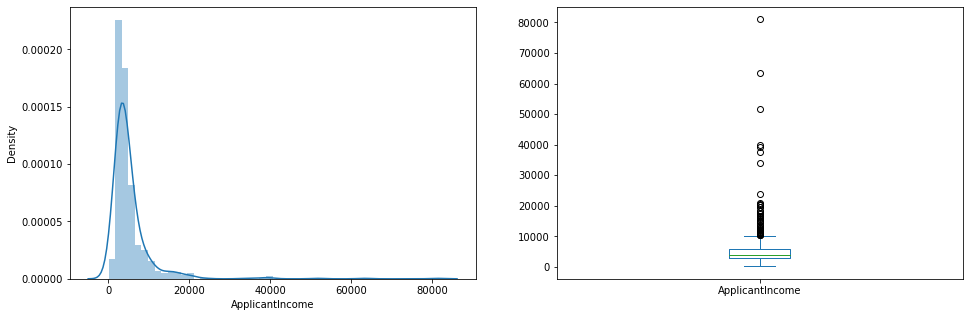

In [12]:
#Diagram 8 - Numerical independent variables
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['ApplicantIncome']); 
plt.subplot(122) 
df['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

From assessing the distribution of the applicant income variable, we can see that a higher number of applicants earn between £0 - £20,000. From the boxplot, we can see outliers exist across applicant income, the distribution is right skewed as the data is gathered towards the left, and the right rail is longer.

A right skew in the data could imply that across the individuals applying for loans in the sample, income inequality exists. Evidence has found that the rise in inequality has been accompanied with upward trends in real house prices and real mortgage debt (Bank of England, 2021). Higher house prices and real mortgage debt could imply that more lower earning applicants are likely to apply for loans as they do not have enough income to offset these expenses. Thus, why there are more applicants with incomes between £0 - £20,000. Albeit, in the sample there are still individuals with high a applicant income applying for loans, which could imply that the financing company also attracts high income borrowers who find it easier to obtain a loan based on their characteristics. We will later assess how this distribution impacts the loan approval rate. 

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


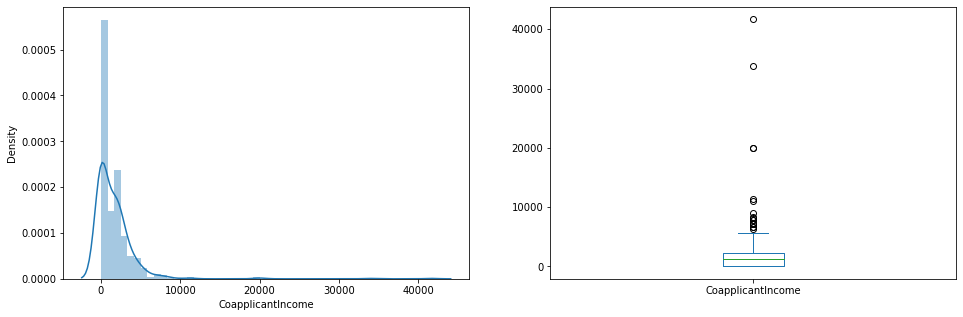

In [13]:
#Diagram 9 - Numerical independent variables
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['CoapplicantIncome']); 
plt.subplot(122) 
df['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Coapplicant income seems to follow a similar distribution to applicant income. The majority of coapplicant incomes range from £0 to £5,000. We can see that outliers exist across coapplicant income, the distribution is right skewed, as the data is gathered towards the left and the right rail is longer. 

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


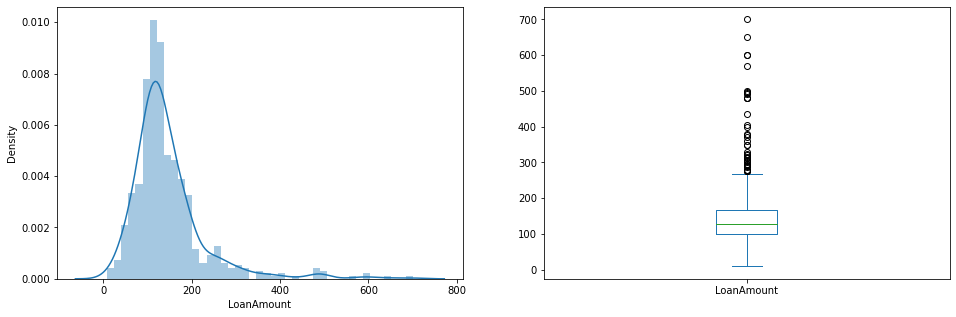

In [14]:
#Diagram 10 - Numerical independent variables
plt.figure(1) 
plt.subplot(121) 
df1=df.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
df['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

The loan amount distribution tells us that applicants on average receive a loan between £200k-£100k, however disparity exists and we can see there are a lot of applicants receiving much higher than this. We can see that outliers exist across loan amount and the distribution is right skewed, as the data is gathered towards the left and the right rail is longer. We will make this normally distributed during the cleaning stage. 

# **Data Cleaning**

**Dealing with missing values**

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see there is not a clean output and many missing values from the dataset, which would not be accepted by algorithms. We will use the following methods to fill in the missing values: imputation using median or mode for numerical variables and imputation using the mode for categorical variables. 

Mode for categorical variables:

In [16]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True) 
df['Married'].fillna(df['Married'].mode()[0], inplace=True) 
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True) 
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True) 
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

Mode for numerical variable (Loan Amount Term):

In [17]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

The mode for loan amount term is 360 so we will use this as the replacement variable as it is the mode repeated number. 

In [18]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

Median for numerical value (Loan Amount):

We can see that the Loan Amount variable contains many outliers so it would be more appropriate to use the median for this numerical variable:

In [19]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can see that through the process of imputation there are now no missing values in the dataset.

**Dealing with categorical variables**

The model algorithms only takes numerical values; thus, the Y or N outcome for loan status will need to be replaced by (1 or 0) to predict the probability of categorical dependent variables. The variable 3+ will need to be changed to 3 for Dependents as the model will not accept this value. 

In [21]:
df['Loan_Status'].replace('N', 0,inplace=True) 
df['Loan_Status'].replace('Y', 1,inplace=True)
df['Dependents'].replace('3+', 3,inplace=True) 

**Dealing with outliers**

We can see that outliers exist within our sample as some variables have a distribution that is right skewed. This is because the data is gathered towards the left and the right rail is longer. Our model would not respond well to outliers, hence a log transformation will remove these outliers and reduce the larger values which can help us obtain a normal distribution. 

<AxesSubplot:>

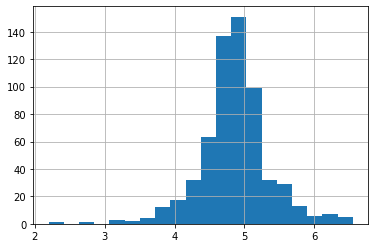

In [22]:
#Diagram 11 - outlier removal
df['LoanAmount_log'] = np.log(df['LoanAmount']) 
df['LoanAmount_log'].hist(bins=20) 

# **Regression: Linear Regression**

The goal of the regression techniques would be for the financing company to predict the loan amount based on the individuals financial attributes. 

**Pairplot of numerical values in dataset**

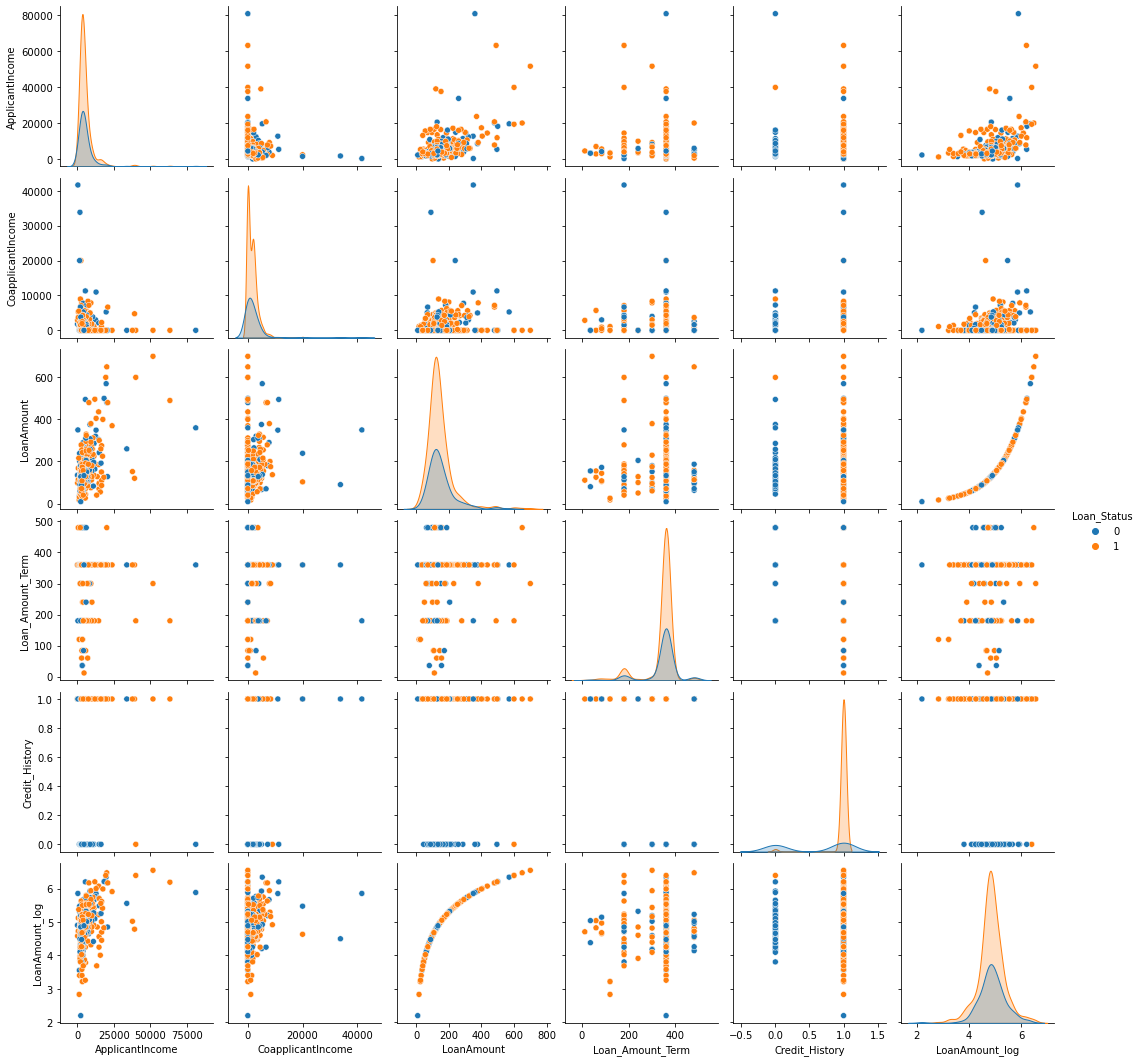

In [23]:
#Diagram 12
sns.pairplot(df, hue='Loan_Status', corner=False)

The pairplot allows us to see the distribution of numerical variables in the sample. The distribution highlights those loans that have been approved or rejected, which allows us to better understand the relationships within the sample. 

Loan amount and applicant income: Most applicants with salary between £0k - £25k have received loans that value anything less than £400k, there are a few applicants within this distribution range that have had rejected loans. There is an unusual case where the individual with the highest income has a rejected loan. 

Loan amount and coapplicant income: The majority of coapplicants have received loans that value anything less than £400k. There are some unusual cases where coapplicants with higher income have had rejected loans. 

Loan amount and Loan amount term: There appears to be a slight positive correlation between loan amount and loan amount term across accepted or rejected loans. We would expect that individuals with a greater loan amount would have a longer period to repay their loan. We can also see that loans with a shorter time period have a higher chance of approval. 

Loan amount and credit history: There are some individuals who have met the credit history guidelines and have a rejected loan status, and there are some individuals who have not met the credit history guidelines and have an accepted loan status. Due to the high loan amount these individuals have been offered; this would spark some concern for the financing company as they appear to be unusual cases. The individual could have met requirements in other ways, or this could be an error. 

We will further investigate the pairplot by breaking it down further to assess interesting correlations.

**Relationship between applicant income and coapplicant income**

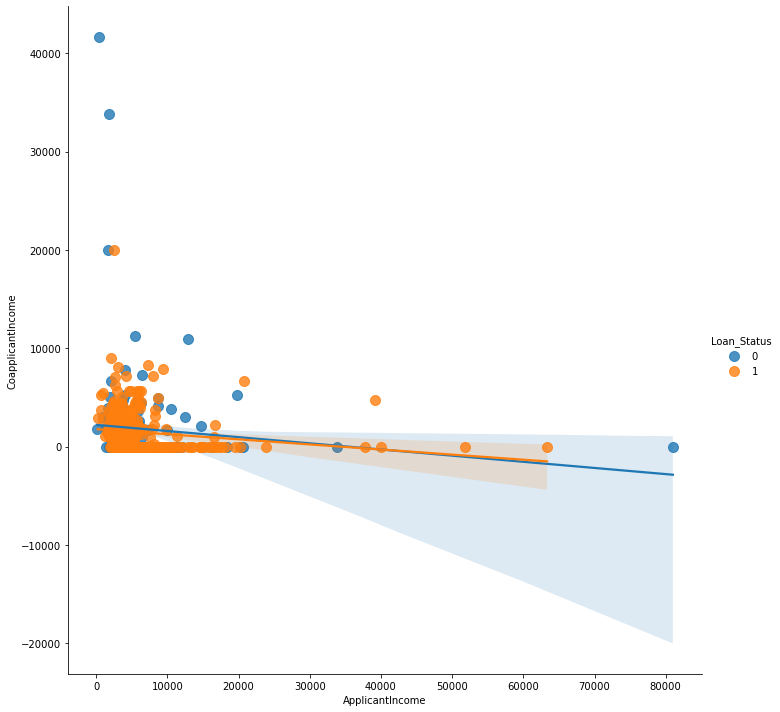

In [24]:
#Diagram 13
sns.lmplot(x='ApplicantIncome', y='CoapplicantIncome', data=df, height=10, scatter_kws={"s": 100}, hue='Loan_Status')

From the scatterplot we can see that a majority of applicants have coapplicants with £0 income, and still manage to get their loan approved. In some instances the applicant earns more than their coapplicant. Our original hypothesis stated that 'applicant income has no impact on coapplicant income'. Evidence from the linear regression supports this statement as we can see there is a negative correlation between applicant income and coapplicant income. 

**Relationship between applicant income and loan amount**

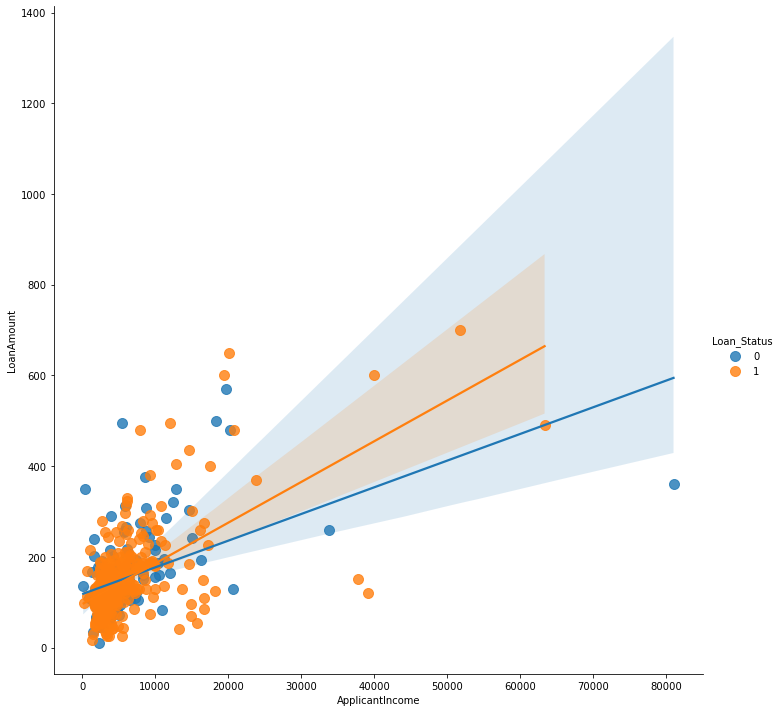

In [25]:
#Diagram 14
sns.lmplot(x='ApplicantIncome', y='LoanAmount', data=df, height=10, scatter_kws={"s": 100},hue='Loan_Status')

Our original hypothesis stated that 'applicants with higher income are more likely to receive a higher loan amount'. Evidence from the linear regression supports this statement as we can see there is a positive correlation between loan amount and the applicant income. Although, correlation does not imply causation as we can see that there are cases where individuals with a high income have still had loans rejected. 

**Creating the Linear Regression model**

Now we have an idea about statistical details of our data. The next step is to divide the data into "attributes" and "labels". Attributes are the independent variables while labels are dependent variables whose values are to be predicted.  We want to predict the loan amount depending upon the applicant income, therefore our attribute set will consist of the 'ApplicantIncome' and the label will be the 'LoanAmount' column.

In [26]:
#feature_data
X = df[['ApplicantIncome']]

#target_data
y = df['LoanAmount']

In [27]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X, y)

LinearRegression()

We will test our Linear Regression model using data from rows 10, 3200 and 88. In this model we are predicting the loan amount based on applicant income.

In [28]:
df.loc[10]

Loan_ID              LP001024
Gender                   Male
Married                   Yes
Dependents                  2
Education            Graduate
Self_Employed              No
ApplicantIncome          3200
CoapplicantIncome       700.0
LoanAmount               70.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 1
LoanAmount_log       4.248495
Name: 10, dtype: object

In [29]:
#prediction for set 1
linreg.predict([[3200]])

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([128.60685149])

An applicant with income of £3200 would most likely receive a loan amount of £128k based on the model prediction.

In [30]:
df.loc[88]

Loan_ID              LP001289
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          8566
CoapplicantIncome         0.0
LoanAmount              210.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 1
LoanAmount_log       5.347108
Name: 88, dtype: object

In [31]:
#prediction for set 2
linreg.predict([[8566]])

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([170.36085381])

An applicant with income of £8566 would most likely receive a loan amount of £170k based on the model prediction.

We will now test our Linear Regression model using data from row 613.

In [32]:
df.loc[613]

Loan_ID               LP002990
Gender                  Female
Married                     No
Dependents                   0
Education             Graduate
Self_Employed              Yes
ApplicantIncome           4583
CoapplicantIncome          0.0
LoanAmount               133.0
Loan_Amount_Term         360.0
Credit_History             0.0
Property_Area        Semiurban
Loan_Status                  0
LoanAmount_log        4.890349
Name: 613, dtype: object

In [33]:
#prediction for set 3
linreg.predict([[4583]])

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139.36827251])

An applicant with income of £4583 would most likely receive a loan amount of £139k based on the model prediction.

# **Evaluating Regression Models**

We will split our data into training and test sets. The training set will be the file that our model learns from and the test set will be the model that we will predict the target variable for. We will do this by using Scikit-Learn's built-in train_test_split() method. We will split 80% of the data to training set while 20% of the data is the test set. The test_size variable is where we actually specify the proportion of test set.

**Training the Algorithm**

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, we will retreive the intercept and coefficient.

In [36]:
print(regressor.intercept_)

105.07819635482957


In [37]:
print(regressor.coef_)

[0.00737842]


This means that for every one unit of change in the applicants income, the change in loan amount offered by the financing company is about 0.007%. This means the more an applicant earns the higher loan amount they can expect to receive. 

**Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. 

In [38]:
y_pred = regressor.predict(X_test)

The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series. We will compare the actual output values for X_test with the predicted values.

In [39]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
454,84.0,157.354308
52,112.0,136.288916
536,324.0,150.330051
469,110.0,137.048894
55,97.0,125.058960
...,...,...
337,176.0,123.524248
376,130.0,169.639379
278,436.0,212.677707
466,70.0,126.822403


Though our model is not very precise, the predicted percentages are fairly close to the actual ones.

**Evaluating the Algorithm**

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. The accuracy metrics we will use for this regression model are MSE, MAE and RMSE scores.

In [40]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 42.37539915262555
Mean Squared Error: 3669.571954822595
Root Mean Squared Error: 60.576991959180305


The root mean squared error is 60.5, which is less than 42% of the mean value of the percentage of all loans i.e. 146.41. This means that our algorithm is slightly off and could be made more accurate. 

The MSE of the model is 3669.57 (2dp), which tells us that we are quite far from finding our line of best fit. This means the data is widely scattered around the regression line. 

Linear regression is a helpful forecasting technique in that it helps us predict what loan amount an applicant may be offered based on their characteristics. This predictive analysis could also allow the financing company to estimate the credit standing of applicants and the possible number of claims in a given period (Teeboom, 2019). On the contrary, this model only looks at the relationship between the dependent and independent variables, this means there might be other factors that could help an applicant receive a higher loan amount that might not be taken into consideration by the linear regression. 

# Classification: Logistic Regression

The goal of the classification techniques would be to provide the financing company with a quick and easy way to select good applicants that are eligible for a loan. It is important for the financing company to assess the risk of the applicant and choose the right candidate for loan verification. Using the classification prediction techniques we can predict whether the applicant is safe or not based on their approval features. The process of approval can be automated via machine learning, which would reduce the need for manual checks and would ensure greater accuracy. 

Logistic regression is a supervised learning technique and allows us to predict the dependent variable given a set of independent variables. In this case, loan status will be our categorical dependent variable as we can assess the output as 0 or 1. When we assess on a scale of 0 to 1, we utilise the sigmoid function (logistic function) to predict values to probabilities. 

In [41]:
#feature_data
X = df[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']]

#target_data
y = df['Loan_Status']

**Fitting the logistic regression to the training set**

In [42]:
import numpy as np

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=200)

logreg.fit(X,y)

LogisticRegression(max_iter=200)

**Predicting the test result**

We will test our Logistic Regression model using data from rows 10, 3200 and 88. In this model we are predicting the loan status based on applicant income, coapplicant income, loan amount term and credit history. If the output is 1 this indicates the loan has been approved and if the output is 0 this indicates the loan has been rejected. 

In [43]:
df.loc[10]

Loan_ID              LP001024
Gender                   Male
Married                   Yes
Dependents                  2
Education            Graduate
Self_Employed              No
ApplicantIncome          3200
CoapplicantIncome       700.0
LoanAmount               70.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 1
LoanAmount_log       4.248495
Name: 10, dtype: object

In [44]:
#prediction for set 1
logreg.predict([[3200, 700.0, 360.0, 1.0]])

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

The results above confirm that based on applicant income of £3200, coapplicant income of £700, loan amount term of 360 months (30 years), and credit history meeting the guidelines, this loan applicantion is likely to be approved as we obtained a loan staus of 1. 

In [45]:
df.loc[88]

Loan_ID              LP001289
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          8566
CoapplicantIncome         0.0
LoanAmount              210.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 1
LoanAmount_log       5.347108
Name: 88, dtype: object

In [46]:
#prediction for set 2
logreg.predict([[8566, 0.0, 360.0, 1.0]])

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

The results above confirm that based on applicant income of £8566, coapplicant income of £0, loan amount term of 360 months (30 years), and credit history meeting the guidelines, this loan applicantion is likely to be approved as we obtained a loan staus of 1.

In [47]:
df.loc[613]

Loan_ID               LP002990
Gender                  Female
Married                     No
Dependents                   0
Education             Graduate
Self_Employed              Yes
ApplicantIncome           4583
CoapplicantIncome          0.0
LoanAmount               133.0
Loan_Amount_Term         360.0
Credit_History             0.0
Property_Area        Semiurban
Loan_Status                  0
LoanAmount_log        4.890349
Name: 613, dtype: object

In [48]:
#prediction for set 3
logreg.predict([[4583, 0.0, 360.0, 0.0]])

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

The results above confirm that based on applicant income of £4583, coapplicant income of £0, loan amount term of 360 months (30 years), and credit history not meeting the guidelines, this loan applicantion is likely to be rejected as we obtained a loan staus of 0. 

Logistic regression shows very good results for our test cases and accurately predicts the loan status. 

# **Evaluating Classification Models (Logistic Regression)** 

**Testing accuracy**

In [49]:
z_pred = logreg.predict(X)

In [50]:
from sklearn import metrics

metrics.accuracy_score(y, z_pred)

0.8127035830618893

The metrics.accuracy_score method concludes that there is a 81.3% accuracy of the logistic regression model.

**Visualising the test result**

In [51]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [52]:
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


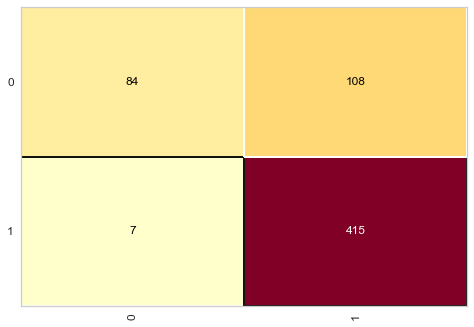

In [53]:
#Diagram 15
cm_logreg = ConfusionMatrix(logreg)
cm_logreg.fit(X, y)
cm_logreg.score(X, y);

* We have 614 points (100% of the records), which means the logistic regression model has managed to produce a prediction for all records in the sample. For an approved loan status we have 415 in the cell highlighted in the dark red colour. This means out of the labels which have been identified as appoved loans by our model, 415 are truly accepted loans and we do not have any false negatives which means none of the loans that have been approved have been falsely identified as rejected loans. 

* For rejected loans status we have 84 in the cell highlighted the yellow colour. This means 84 loans were truly rejected. 

* We have 108 false negatives as they were rejected loans but really depending on the applicants criteria they should have been accepted. Likewise, we have 7 false positive as these accepted loans should have been rejected based on the applicants criteria. 

The aim of the classification algorithms is to help us predict the class of an unknown dataset. This model is likely to help the financing company set up efficient validation mechanisms. Although, incorporation of other techniques that outperform the performance of popular data mining models would have to be implemented and tested for domain (Vangaveeti, 2020). 

# Classification: K-Nearest Neighbours (KNN)

KNN is a supervised learning technique and works on a principle assuming every data point falling near to each other is falling in the same class. Nearest neighbours are those data points that have minimum distance in feature space from our new data point. K is the number of such data points we consider in our implementation of the algorithm. Therefore, distance metric and K value are two important considerations while using the KNN algorithm. We will choose a random number by default and set n equal to 4 for the purpose of this KNN model. 

**Fitting and training the algorithm**

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=4)

We will use the *train_test_split* to create the data for testing and training. This will include the following:
* X_train
* X_test
* y_train
* y_test

We will use a 75% training and 25% testing proportion. Random state will be set at 4. 

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

Extracting and printing the number of rows for X_train, X_test, y_train and y_test:

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(460, 4)
(154, 4)
(460,)
(154,)


**Predicting the test result**

We will test our KNN model using data from rows 10, 3200 and 88. In this model we are predicting the loan status based on applicant income, coapplicant income, loan amount term and credit history. If the output is 1 this indicates the loan has been approved and if the output is 0 this indicates the loan has been rejected. 

In [57]:
#prediction for set 1
knn.predict([[3200, 700.0, 360.0, 1.0]])

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

The results above confirm that based on applicant income of £3200, coapplicant income of £700, loan amount term of 360 months (30 years), and credit history meeting the guidelines, this loan applicantion is likely to be approved as we obtained a loan staus of 1. 

In [58]:
#prediction for set 2
knn.predict([[8566, 0.0, 360.0, 1.0]])

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

The results above confirm that based on applicant income of £8566, coapplicant income of £0, loan amount term of 360 months (30 years), and credit history meeting the guidelines, this loan applicantion is likely to be approved as we obtained a loan staus of 1.

In [59]:
#prediction for set 3
knn.predict([[4583, 0.0, 360.0, 0.0]])

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

The results above confirm that based on applicant income of £4583, coapplicant income of £0, loan amount term of 360 months (30 years), and credit history not meeting the guidelines, this loan applicantion is likely to be rejected as we obtained a loan staus of 0. 

KNN also shows very good results for our test cases and accurately predicts the loan status. 

# **Evaluating Classification Models (KNN)** 

**Testing model accuracy**

In [60]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X, np.ravel(y))
y_pred_knn4 = knn.predict(X)
round(metrics.accuracy_score(y, y_pred_knn4),2)

0.74

KNN has an accuracy score of 74% which is less than the logistic regression accuracy score. This implies it would be best to use logistic regression for more reliable results, even though it still isn't the most optimal. If we used the KNN model to classify loans based on the individuals features then it is more likely that loan applications would produce flase negatives/positives. 

**Visualising the test result**

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ConfusionMatrix(ax=<AxesSubplot:>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7fe46d11cfd0>,
                estimator=KNeighborsClassifier())

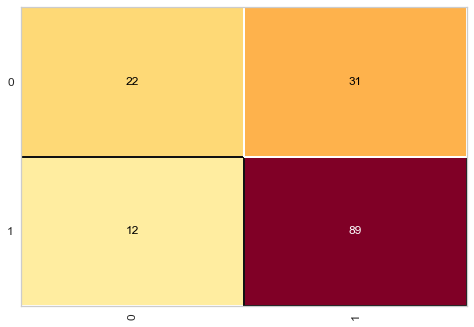

In [61]:
#Diagram 16
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, np.ravel(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

# The ConfusionMatrix
cm = ConfusionMatrix(knn)

# Fit: fits the passed model.
cm.fit(X_train, np.ravel(y_train))

# To create the ConfusionMatrix, we need some test data. 
# Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, np.ravel(y_test))

cm

* We have 154 points (25% of the records). For an approved loan status we have 89 in the cell highlighted in the dark red colour. This means out of the labels which have been identified as appoved loans by our model, 89 are truly accepted loans and we do not have any false negatives which means none of the loans that have been approved have been falsely identified as rejected loans. 

* For rejected loans status we have 22 in the cell highlighted the yellow colour. This means 22 loans were truly rejected. 

* We have 31 false negatives as they were rejected loans but really depending on the applicants criteria they should have been accepted. Likewise, we have 12 false positive as these accepted loans should have been rejected based on the applicants criteria. 


**Testing the best k values**

Testing with 40% of the total dataset.

[0.5691056910569106, 0.47560975609756095, 0.6097560975609756, 0.5528455284552846, 0.6382113821138211, 0.6219512195121951, 0.6544715447154471, 0.6260162601626016, 0.6666666666666666, 0.6260162601626016, 0.6422764227642277, 0.6463414634146342, 0.6422764227642277, 0.6341463414634146, 0.6504065040650406, 0.6544715447154471, 0.6747967479674797, 0.6666666666666666, 0.6829268292682927, 0.6544715447154471, 0.6788617886178862, 0.6788617886178862, 0.6747967479674797, 0.6747967479674797, 0.6747967479674797, 0.6626016260162602, 0.6747967479674797, 0.6666666666666666, 0.6788617886178862]


Text(0, 0.5, 'Testing accuracy')

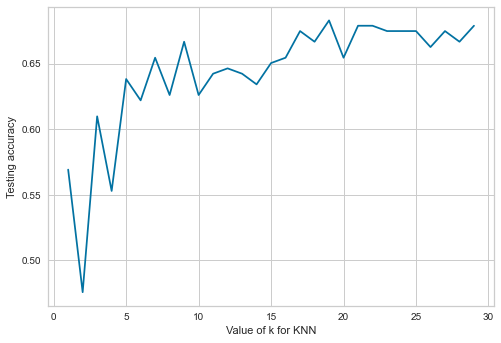

In [62]:
#Diagram 17
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

k_range = range(1,30)

scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, np.ravel(y_train))
  y_pred = knn.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  scores.append(accuracy)


print(scores)

plt.plot(k_range, scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Testing accuracy")

The chart shows that the more neighbours used for predicting the output, the better the accuracy score gets. There is an initial dip but after 2 neighbours there is a sharp fluctuating increase in the accuracy score, this then levels out after 5 neighbours and the accuracy score increases at a slower rate. Our best K values appears to be between 15-30 as any K value within this range has a testing accuracy greater than 65%. I will choose a K of 19 to predict the loan class as it appears to have the highest accuracy score of 69% according to the graph.

Testing with 10% of the total dataset. 

Text(0, 0.5, 'Testing accuracy')

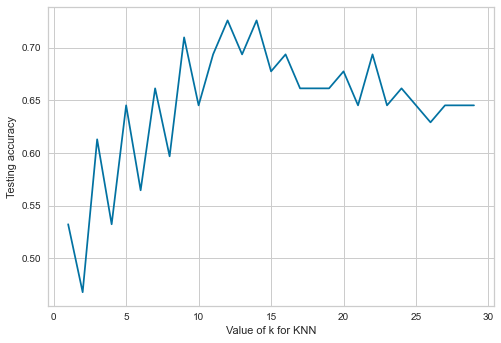

In [63]:
#Diagram 18
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

import matplotlib.pyplot as plt

k_range = range(1,30)

scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, np.ravel(y_train))
  y_pred = knn.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  scores.append(accuracy)

plt.plot(k_range, scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Testing accuracy")

When we test with 10% of the dataset there is an initial dip but after 2 neighbours there is a sharp fluctuating increase in the accuracy score, this then peaks at 12 and 14 neighbours and gradually levels off at 15 neighbours at a steady decreasing rate. From this, we observe that low testing data does not provide realistic results.

Testing with 80% of the total dataset. 

Text(0, 0.5, 'Testing accuracy')

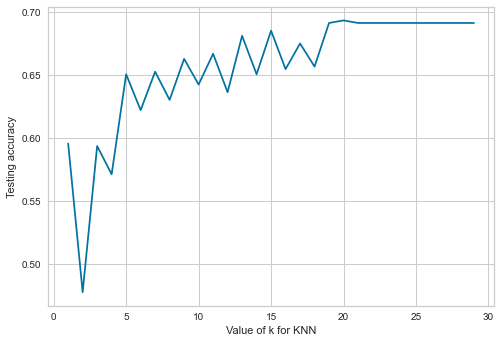

In [64]:
#Diagram 19
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=4)

import matplotlib.pyplot as plt

k_range = range(1,30)

scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, np.ravel(y_train))
  y_pred = knn.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  scores.append(accuracy)

plt.plot(k_range, scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Testing accuracy")

When we testing with 80% of the dataset we observe that high testing data depicts to low testing training dataset (closely fitted to our 40% dataset), which implies there is overfitting in our model. 

We can observe that from testing 10%, 40% and 80% of the data the accuracy score when testing 40% of the data follows similar pattern to when we test 80% of the data. We get less accuracy when we only test with 10% of the dataset. The best k value when testing 40% and 80% of the data is 19 as we get the highest accuracy level. 

We will now visualise this test result using 80% test data and 19 for our k neighbours values. 

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ConfusionMatrix(ax=<AxesSubplot:>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7fe46d4b50d0>,
                estimator=KNeighborsClassifier(n_neighbors=19))

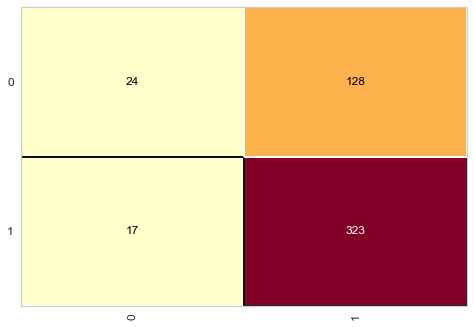

In [65]:
#Diagram 20
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X, np.ravel(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=4)

# The ConfusionMatrix
cm = ConfusionMatrix(knn)

# Fit: fits the passed model.
cm.fit(X_train, np.ravel(y_train))

# To create the ConfusionMatrix, we need some test data. 
# Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, np.ravel(y_test))

cm

* We have 492 points (80% of the records). For an approved loan status we have 323 in the cell highlighted in the dark red colour. This means out of the labels which have been identified as appoved loans by our model, 323 are truly accepted loans and we do not have any false negatives which means none of the loans that have been approved have been falsely identified as rejected loans. 

* For rejected loans status we have 24 in the cell highlighted the yellow colour. This means 24 loans were truly rejected. 

* We have 128 false negatives as they were rejected loans but really depending on the applicants criteria they should have been accepted. Likewise, we have 17 false positive as these accepted loans should have been rejected based on the applicants criteria. 

The difference in confusion matrix from testing 25% of the data with n=4 is far off from when we test 80% of the data using n=19. We have more loans that have been approved or rejected, albeit, we also have more false negatives and false positives. This indictes that even if we use a larger testing, there are still outputs with inaccuracies in this model.

**Cross validation**

In this section we will initialize a KNN classifer and feed it into the cross_validation function from sklearn. This function receives a model, its training data, the array or dataframe column of target values, and the number of folds for it to cross validate over (the number of models it will train). The cross validation object stores the out of sample accuracy of each of its trained models. Taking the average of these K out-of-sample scores gives you the model’s cross-validation accuracy, a low-variance estimate of how the model will perform on unseen data.

In [66]:
from sklearn.model_selection import cross_validate

model = KNeighborsClassifier(n_neighbors=3)
cv1 = cross_validate(model, X, y, cv=5)
print(cv1['test_score'])

[0.6504065  0.58536585 0.60162602 0.53658537 0.6147541 ]


The mean of the cross validation scores will be the accuracy of our model. 

In [67]:
print(cv1['test_score'].mean())

0.5977475676396108


We will create a new train test split set up for our KNN classifier. The random state is 2 and ensures each run shows the same result.

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2) 

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6103896103896104

If we remove the random state our results will always remain random.

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75) 

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6558441558441559

Now we will cross validate.

In [70]:
#using 5 folds
from sklearn.model_selection import cross_validate

cv1 = cross_validate(clf, X, y, cv=5)
print(cv1['test_score'].mean())

0.5977475676396108


In [71]:
#using 10 folds
from sklearn.model_selection import cross_validate

cv1 = cross_validate(clf, X, y, cv=10)
print(cv1['test_score'].mean())

0.6108143839238498


In [72]:
#using 20 folds
from sklearn.model_selection import cross_validate

cv1 = cross_validate(clf, X, y, cv=20)
print(cv1['test_score'].mean())

0.6174193548387097


There is a larger accuracy difference between 5-10 than there is between 10-20. As after 10 we start to see diminishing returns on accuracy. It seems with cross validation our results converge to accuracy score of 0.60.

After testing with both models we can now refer back to original hypothesis which stated that 'the applicant income, coapplicant income, loan amount term and credit history impact whether a loan will be accepted or rejected'. From our results we can confirm that the applicant income, coapplicant income, loan amount term and credit history do impact whether a loan will be accepted or rejected. 

Across the classification techniques we can see that it is mainly those appicants whose credit history does not meet guidelines that get rejected for loans. Both KNN and logistic regression models are able to pick up on this but there are also instances of flase positives/negatives which make both models less reliable. The disadvantage of both classification techniques is that it emphasizes different weights to each factor but in real life sometimes loans can be approved on the basis of a single strong factor only, which is not possible through this system (Nagajyothi, 2020). 

It would be recommended that the financing company uses the logistic regression model instead of KNN to classify loans. This is because logistic regression has the greatest attainable accuracy score at 81.3% where as KNN only has 74% accuracy. Under logistic regression we also get fewer false positives/negatives than KNN. 

# **Clustering: K-means** 

Clustering analysis is an example of unsupervised learning. This model can facilitate with understanding behavioural patterns that impact loan approval. It is a helpful technique for the financing company as it can help identify customers in terms of risk profile, profitability and groups that share similar features. We will use K-means to segment customers into different groups based on high income, average income and low income. These three clusters can be assigned as initial centroids, which will help reveal which points in the dataset are closest to each cluster. 

In [73]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [74]:
model = KMeans(n_clusters=3)

In [75]:
model.fit(X)

KMeans(n_clusters=3)

In this model we will test the clusters that exist across applicant income and their loan amount. First we will assign points to the closest cluster centroid, then recompute cetroids of newly formed clusters and then repeat both of these steps. 

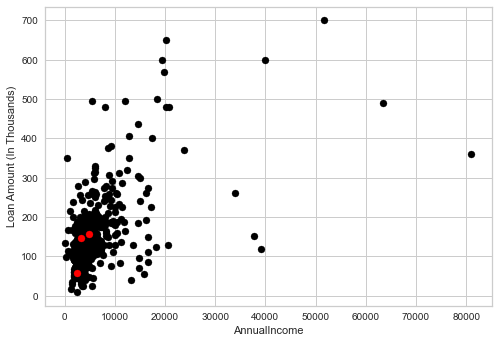

In [76]:
#Diagram 21
Z = df[["LoanAmount","ApplicantIncome"]]
K=3

# Select random observation as centroids
Centroids = (Z.sample(n=K))
plt.scatter(X["ApplicantIncome"],Z["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [77]:
diff = 1
j=0

while(diff!=0):
    XD=Z
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        Z[i]=ED
        i=i+1

    C=[]
    for index,row in Z.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    Z["Cluster"]=C
    Centroids_new = Z.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = Z.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

/var/folders/t0/vv75knk555sbfc42cx0y7wg80000gn/T/ipykernel_5156/3659024776.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z[i]=ED
/var/folders/t0/vv75knk555sbfc42cx0y7wg80000gn/T/ipykernel_5156/3659024776.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z["Cluster"]=C


3955.1229168997033
4292.856636602616
4544.373192369693
5187.27415074302
2372.9488890329967
3640.829124366954
6002.087104911787
10356.093263048757
10014.821018405832
842.3788101885841
474.71478467677747
252.0361624138223
128.50751429551985
134.93707255238328
0.0


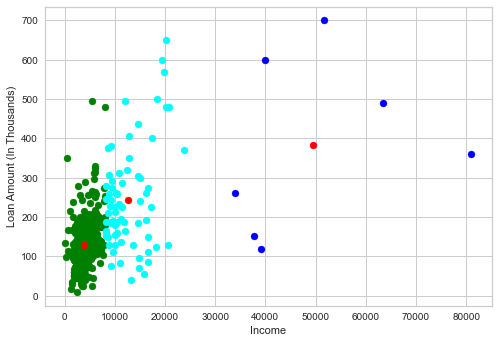

In [78]:
#Diagram 22
#Visualise the clusters
color=['blue','green','cyan']
for k in range(K):
    data=Z[Z["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Diagram 22 shows clusters that are highlighted around the three centroids highlighted in red. These clusters may depict the different income classes such as high income, average income and low income. The colours green, blue and cyan help us identify how those earning similar incomes are likely to receive a similar loan amount. Evidence suggests that income is strongly and positively correlated to private credit from banks and other financial institutions (Delis, 2020). This helps support our conclusion as we can see that those in a particular income cluster receive similar loan amounts. 

We can supplement this analysis by assessing how coapplicant income can affect the loan amount in addition to the applicant income. 

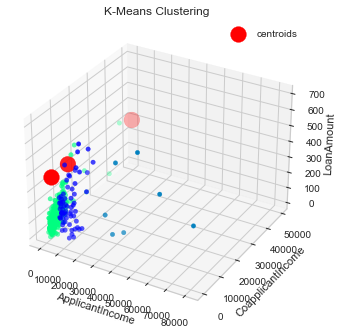

In [79]:
#Diagram 23
# Instantiate Kmeans
km = KMeans(3)
clusts = km.fit_predict(X)

#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(km.cluster_centers_[:, 3],
            km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='red',
            label='centroids')
scatter = ax.scatter(df['ApplicantIncome'],df['CoapplicantIncome'], df['LoanAmount'],
                     c=clusts,s=20, cmap='winter')


ax.set_title('K-Means Clustering')
ax.set_xlabel('ApplicantIncome')
ax.set_ylabel('CoapplicantIncome')
ax.set_zlabel('LoanAmount')
ax.legend()
plt.show()

From the graph we can identify three clusters. Two of the clusters are stronger as there is more evidence to support that a higher total income (applicant income and coapplicant income combined) supports the individuals loan application and has resulted in them receiving a particular loan amount from the financing company. This indicates that the financing company offer a similar loan amount to those with low income and average income. There are less people that exceed a certain total income which means that the third and final cluster is less strong. 

# **Evaluating Classification Models (K-means)** 

From the clustering graphs above, we can see the bottom two centroids are quite close to eachother. We can fix this via K-means + initialization that places centroids with the aim of maximizing the distance between them (Alan, 2022).

To evaluate the K-means clustering model we can use Silhouette Analysis which looks at the grouping of similar points together. A point of a cluster should be as far as possible from the points in the next closest cluster and the second closest cluster should be at a significant distance which ensures other clusters are formed optimally (Alan, 2022). Silhouette analysis would enable us to obtain silhouette scores for our data and assess whether the k values are significant. This method would enable us to identify any outliers in the dataset and ensure the clusters were assigned to the correct centroids. 

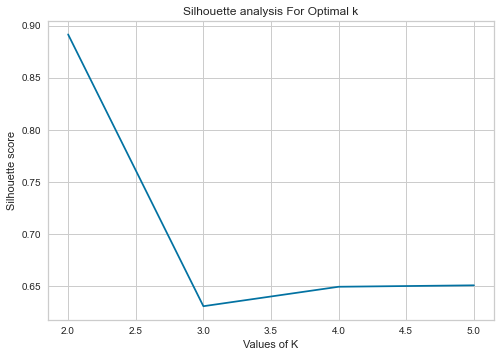

In [80]:
#Table 24
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_
 # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

From the silhouette analysis above, we can see that a K value of 2 produces a higher silhouette score. This indicates that the optimal clusters for the sample would be two, and anything greater than that would be a bad pick given the silhouette score diminishes as we increase the K value. 

Our original hypothesis stated that 'income inequality exists within the data which results in different financial product offerings'. From our clustering analysis we can see that there are different income clusters which has resulted in the financing company to differ their loan amount and adjust for the different risk levels of applicants based on their income and likelihood of paying the loan off. This means that we can accept our hypothesis. 

From our analysis of K-means clustering we can see that this method is helpful in allowing banks to structure three different strategies for each group instead of creating different strategies for individual customers (Pulkit, 2019). It saves the analyst time with having to sort the data to discover patterns and allows the bank to develop tailored loan solutions. Although, there are risks that this model could fail to describe certain characteristics of a distribution. This may cause a bank to change its risk appetite which can have a negative impact on customers, firms and the financial system. 

This model may not provide the full picture of each applicant’s attributes and does not give an explicit reason for their grouping. It does not give indication of the risk faced by each cluster and we cannot assess which clusters are riskier than others. All in all, the financing system's main concern consists in managing credit risk, therefore the analysis should be supported with further quantitative robust techniques (Dardac and Boitan, 2009).

# **Conclusion** 

The original problem statement was that loan classification is a common real-life problem that financing companies face. Lack of machine intelligence makes it difficult to understand whether a loan should be approved based on the individual attributes, the loan amount that should be offered to the individual and what financial products would be suited to them based on their risk profile. 

In this research, we leverage a variety of modelling techniques to solve the issues that a financing company would face with loan approval. In order to realise this, we have used concepts such as linear regression, logistic regression, KNN and K-means clustering. Experimental results have shown that applicants with higher income would receive higher loan amounts, however loan approval also takes into consideration the applicants other quantitative attributes i.e., coapplicant income, loan amount, loan amount term and credit history. We have also seen evidence that different applicant attributes lead to segmentation based on risk profile, which makes it easier for the financing company to tailor different financial products to their customers.

**Reflection**

Although the predictions from the models were not as accurate as we would like, they still provide a good indication on which loan should be approved, the financial characteristics of each individual and the loan amount they should be offered. We did obtain some false negatives/positives from the data, which makes us question the reliability of results. If further analysis were to be completed, I would take steps to avoid the black box approach that could prevent us from fully understanding the algorithm's decisions. This would be to improve the predictive power of the models we have used so we can better understand why specific segments and classifications have been allocated. 

In future, I would like to support this analysis with other robust models such as the Decision Tree Classifier, Support Vector Machine (SVM) and Naïve Bayes Classification. These additional models would help improve accuracy of results and could act as challenger models in parallel with the financing companies loan approval models to discover where other credit signals could potentially lift performance (Dash, 2021). 

In addition to this, I would like to widen the dataset so that I can use a larger sample to train the model. This is because too little training data results in a poor approximation. An over-constrained model will underfit the small training dataset, whereas an under-constrained model, in turn will likely overfit the training data, both resulting in poor performance (Brownlee, 2020). As we only had 614 rows but obtained an accuracy score of 81.2% from the logistic regression, testing on a dataset with 1000 rows might help us obtain optimal accuracy. 

I would also prefer to analyse categorical variables such as number of dependents, education level, marital status or employment status to see whether non-financial variables have an impact on loan approval, loan amount and customer segmentation. Using new data sources that understand customer behaviours more precisely, open new segments and react to faster changes in the business environment would enable the financing company to remain more competitive. Financing companies can take advantage of fresh opportunities for loan approval models to define lending parameters more precisely, sharpen their ability to approve creditworthy customers, and reject proposals from customers who cannot afford further debt (Dash, 2021).

Overall, this analysis has provided useful outputs that would be valuable insights within my organisation. The models would help improve decision making processes that facilitate the lending process. Such models would reduce risks to the financial system as they produce improved efficiency gains as a result of more precise and automated decisioning.

# **References** 

Alan, 2022. Evaluation of Unsupervised Learning with K-Means - Analytics Mag. [online] Analytics Mag -. Available at: <https://analyticsmag.com/understanding-the-evaluation-of-unsupervised-learning-with-k-means/> [Accessed 25 June 2022].

Bank of England, 2021. Income inequality, mortgage debt and house prices. Bank of England.

Clark, D., 2019. How Does Being Self-employed Impact Your Finances? | moneyfacts.co.uk. [online] Moneyfacts. Available at: <https://moneyfacts.co.uk/business/guides/how-does-being-self-employed-impact-your-finances/> [Accessed 22 June 2022].

Dardac, N. and Boitan, I., 2009. A Cluster Analysis Approach for Banks’ Risk Profile: The Romanian Evidence. [online] Available at: <https://www.ersj.eu/repec/ers/papers/09_1_p7.pdf> [Accessed 25 June 2022].

Dash, R., 2021. Designing next-generation credit-decisioning models. [online] Available at: <https://www.mckinsey.com/business-functions/risk-and-resilience/our-insights/designing-next-generation-credit-decisioning-models> [Accessed 26 June 2022].

Delis, M., 2020. [online] Newyorkfed.org. Available at: <https://www.newyorkfed.org/medialibrary/media/research/staff_reports/sr929.pdf> [Accessed 25 June 2022].

McGurran, 2022. Women and Credit 2020: How History Shaped Today’s Credit Landscape. [online] Experian.com. Available at: <https://www.experian.com/blogs/ask-experian/women-and-credit/> [Accessed 22 June 2022].

Nagajyothi, V., 2020. Loan approval prediction using KNN, decision Tree and Naïve Bayes models. International Journal of Engineering in Computer Science, [online] p.32. Available at: <https://www.computersciencejournals.com/ijecs/article/view/30/1-2-18> [Accessed 25 June 2022].

Pulkit., 2019. K Means Clustering | K Means Clustering Algorithm in Python. [online] Analytics Vidhya. Available at: <https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/> [Accessed 30 April 2022].

Stolba, 2019. The Cost of Education: How Graduate Degrees Affect Debt and Credit. [online] Experian.com. Available at: <https://www.experian.com/blogs/ask-experian/research/how-graduate-degrees-affect-debt-and-credit/> [Accessed 24 June 2022].

Teeboom, L., 2019. Application of Regression Analysis in Business. [online] Small Business - Chron.com. Available at: <https://smallbusiness.chron.com/application-regression-analysis-business-77200.html> [Accessed 25 June 2022].

Trulia, 2016. How Your Relationship Status Affects Mortgage-Worthiness. [online] Forbes. Available at: <https://www.forbes.com/sites/trulia/2016/08/31/how-your-relationship-status-affects-mortgage-worthiness/?sh=69acec876114> [Accessed 22 June 2022].

Vangaveeti, S., 2020. LOGISTIC REGRESSION BASED LOAN APPROVAL PREDICTION. [online] Jctjournal.com. Available at: <http://www.jctjournal.com/gallery/39-may-2020.pdf> [Accessed 25 June 2022].
